In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas
import glob
import os
import glob
import matplotlib as mpl

To this point, we've focused mostly on the processing of data.  But Python can be used to create maps, both for exploratory analysis, and for polished, publication-ready maps.  Take a look at [pythonmaps.com](https://www.pythonmaps.com/) to see what Python can do.  Several plotting libraries have gone by the wayside over the past few years (e.g., [CARTOframes](https://carto.com/developers/cartoframes/)).  These aren't the only game in town.  See [Bokeh](https://bokeh.org/) and [Datashader](https://datashader.org/) (and [xarray.spatial](https://datashader.org/user_guide/Geography.html)) in particular.

Let's look at a few of these:

* [Pretty Maps](#Pretty-Maps)
* [Geoplot](#Geoplot)
* [Contextily](#Contextily)
* [Cartopy](#Cartopy)
* [Basemap](#Basemap) (effectively deprecated)

# Pretty Maps

[PrettyMaps](https://github.com/marceloprates/prettymaps) is a super fast way to make maps using [OpenStreetMap](https://www.openstreetmap.org/#map=12/11.0733/106.3078) data.  

**Unfortunately, this doesn't seem to be running at the moment, so leaving this here as an example only.**

In [ ]:
# Install, if necessary
# !pip install prettymaps

import prettymaps

In [ ]:
# A simple map of Blacksburg

plot = prettymaps.plot('White House')

# Geoplot

[Geoplot](https://residentmario.github.io/geoplot/) comes installed with [Geopandas](https://geopandas.org/en/stable/), and is its mapping engine (so this should all look fairly familiar).  Geoplot builds on [cartopy](https://scitools.org.uk/cartopy/docs/latest/).  

Be sure to review the [gallery](https://residentmario.github.io/geoplot/gallery/index.html) for more examples.

If needed, install using:
~~~
conda install geoplot -c conda-forge
~~~

In [12]:
import geoplot as gplt
import geoplot.crs as gcrs

<AxesSubplot:>

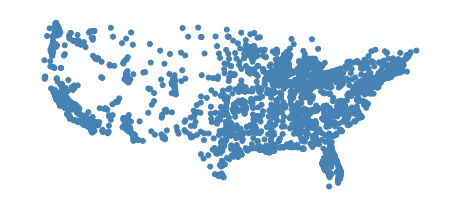

In [7]:
# A simple example: point plot

usa_cities = geopandas.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')    # Note the nice query syntax
gplt.pointplot(continental_usa_cities)

<AxesSubplot:>

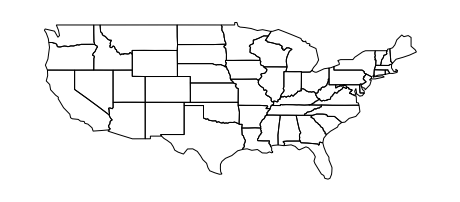

In [9]:
# Polygon plot

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

<AxesSubplot:>

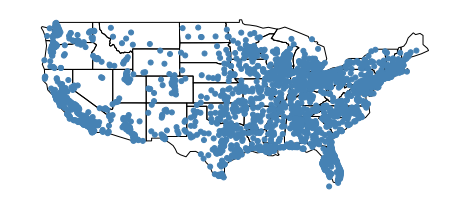

In [10]:
# Syntax for combining multiple layers (overplotting) follows what we've seen with geopandas

ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

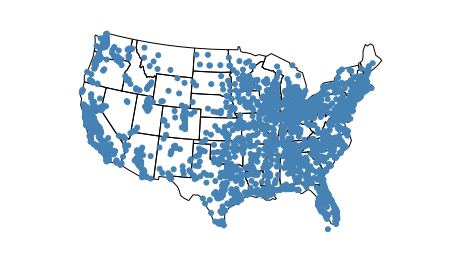

In [13]:
# Projections

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

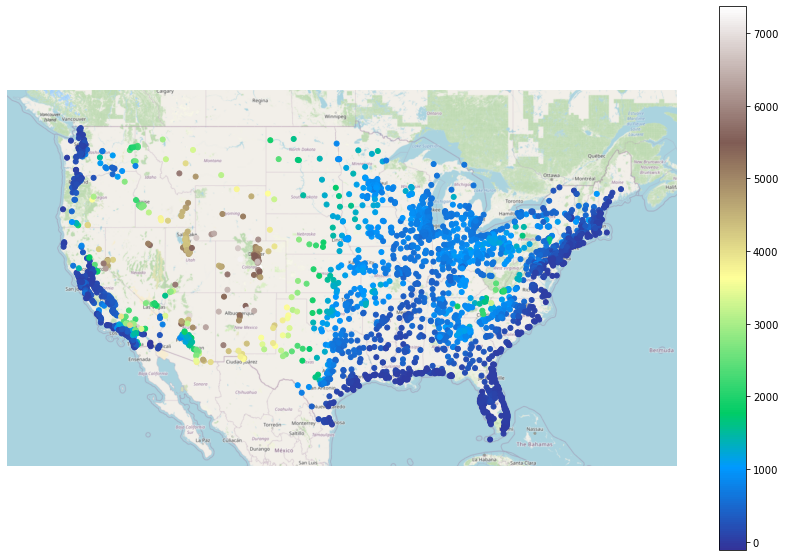

In [15]:
# Adding basemaps

ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator(),figsize=(15,10))
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', legend=True)

## Choropleths

In [43]:
df = geopandas.read_file('https://github.com/thomaspingel/geodata/raw/master/election/election_conus.gpkg')
df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,state,...,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,CALIFORNIA,...,31.62,61.73,-30.11,6006429,11110250,17500881,34.32,63.48,-29.16,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,DISTRICT OF COLUMBIA,...,4.07,90.48,-86.41,18586,317323,344356,5.40,92.15,-86.75,"MULTIPOLYGON Z (((-77.11976 38.93434 0.00000, ..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,FLORIDA,...,49.02,47.82,1.20,5668731,5297045,11067456,51.22,47.86,3.36,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,GEORGIA,...,50.77,45.64,5.13,2461854,2473633,4999960,49.24,49.47,-0.23,"MULTIPOLYGON Z (((-85.60516 34.98468 0.00000, ..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,IDAHO,...,59.26,27.49,31.77,554119,287021,868014,63.84,33.07,30.77,"MULTIPOLYGON Z (((-117.24303 44.39097 0.00000,..."


<GeoAxesSubplot:>

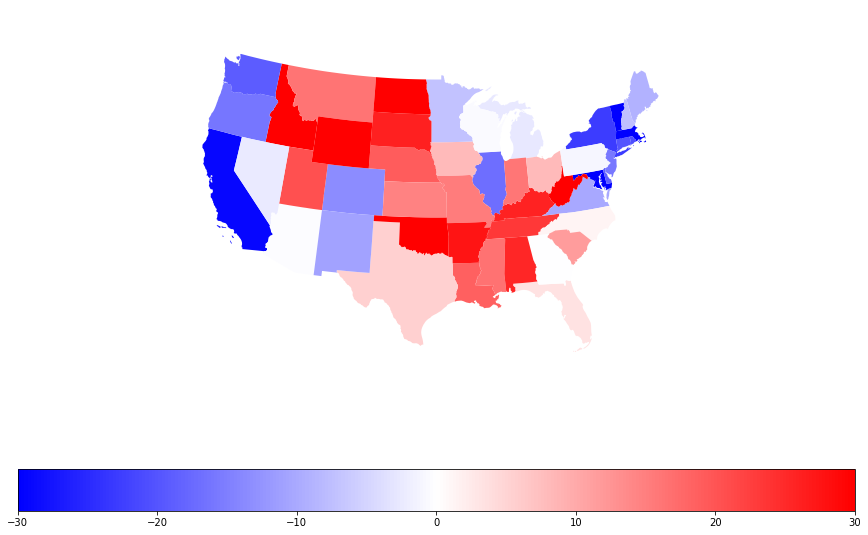

In [59]:
# In Matplotlib, we can supply vmin and vmax arguments.  We can't do that here, and must instead follow
# some slightly more sophisiticated techniques for normalization 
# https://matplotlib.org/3.1.1/tutorials/colors/colormapnorms.html

norm = mpl.colors.Normalize(vmin=-30, vmax=30)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='bwr').cmap

gplt.choropleth(df, hue='gop_minus_dem_prc_2020', projection=gcrs.AlbersEqualArea(),cmap=cmap,norm=norm,
                legend=True,figsize=(15,10),legend_kwargs={'orientation': 'horizontal'})

## [KDE (Density) Plots](https://residentmario.github.io/geoplot/plot_references/plot_reference.html#kdeplot)

<GeoAxesSubplot:>

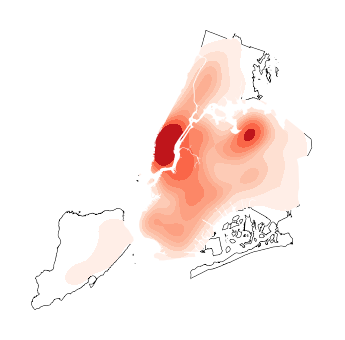

In [62]:
boroughs = geopandas.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = geopandas.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.polyplot(boroughs, projection=gcrs.WebMercator(), zorder=1)
gplt.kdeplot(collisions, cmap='Reds', shade=True, thresh=0.05,
             clip=boroughs, ax=ax)

## Cartograms

<GeoAxesSubplot:>

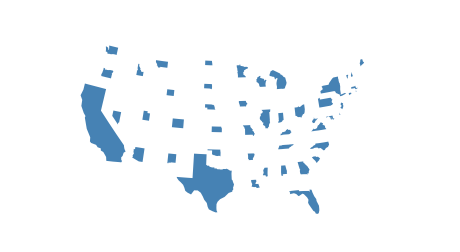

In [64]:
contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.cartogram(contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea())

## Sankey Diagrams

Text(0.5, 1.0, 'Streets in Washington DC by Average Daily Traffic, 2015')

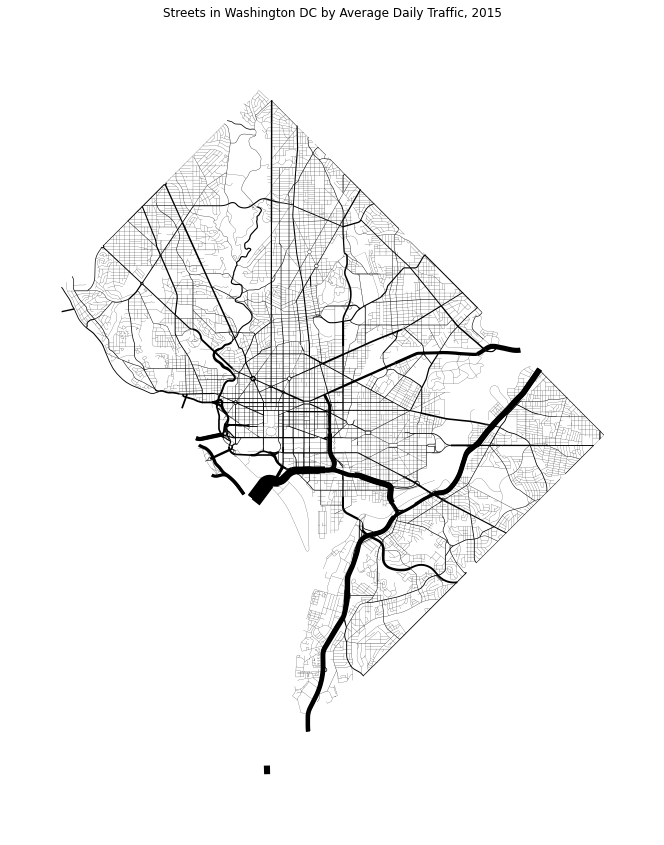

In [19]:
# One of my all-time favorites: A Sankey plot of traffic in Washington DC

dc_roads = geopandas.read_file(gplt.datasets.get_path('dc_roads'))

gplt.sankey(
    dc_roads, projection=gcrs.WebMercator(),
    scale='aadt', limits=(0.1, 10), color='black',figsize=(15,15)
)

plt.title("Streets in Washington DC by Average Daily Traffic, 2015")

# Contextily

GeoPlot uses [Contextily](https://contextily.readthedocs.io/en/latest/) to serve basemaps, and a little familiarity with it will help you see your options.

In [66]:
import contextily as cx

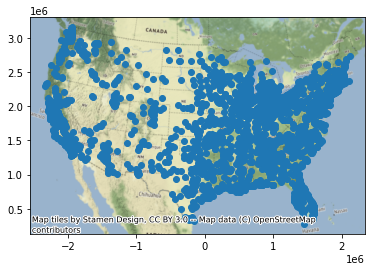

In [71]:
df = geopandas.read_file(gplt.datasets.get_path('usa_cities'))
df = df.query('STATE not in ["HI", "AK", "PR"]')    # Note the nice query syntax
df = df.to_crs(5070)

ax = df.plot()
cx.add_basemap(ax,crs=df.crs.to_string())

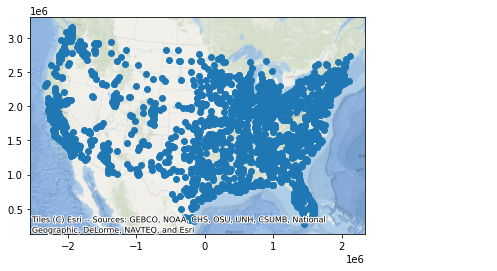

In [85]:
# specify the source to control the basemap

ax = df.plot()
cx.add_basemap(ax,crs=df.crs.to_string(),source=cx.providers.Esri.OceanBasemap)

In [80]:
# Here are the providers:

cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'OpenSeaMap': {'url': 'https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png',
  'html_attribution': 'Map data: &copy; <a href="http://www.openseamap.org">OpenSeaMap</a> contributors',
  'attribution': 'Map data: (C) OpenSeaMap contributors',
  'name': 'OpenSeaMap'},
 'OPNVKarte': {'url': 'https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': 'Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': 'Map memomaps.de CC-BY-SA, map data (C) OpenStreetMap contributors',
  'name': 'OPNVKarte'},
 'OpenTopoMap': {'url': 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
  'attribution': 'Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA)',
  'name': 'OpenTopoMap'},
 'OpenRailwayMap': {'url': 'https://{s}.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
  'max_zoom': 19,
 

<AxesSubplot:title={'center':'Éire / Ireland'}, xlabel='X', ylabel='Y'>

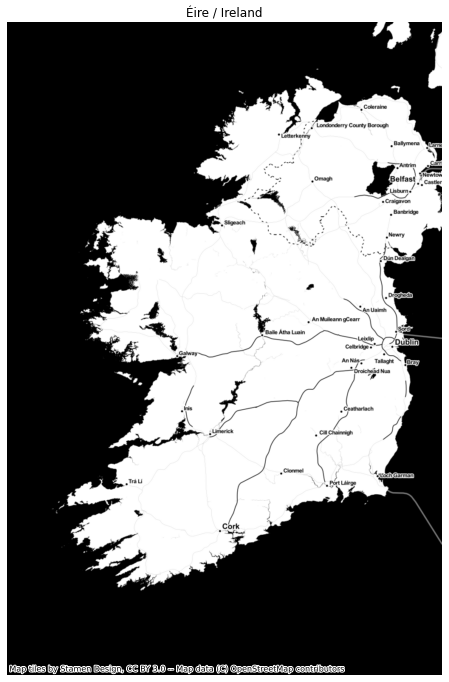

In [86]:
# Experiment with providers to look at maps you're interested in

provider = cx.providers.Stamen.Toner
myplace = cx.Place("Ireland", source=provider)
myplace.plot()

# Cartopy

If you're interested for solid, static maps, [Cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) is a good place to start.

In [89]:
import cartopy.crs as ccrs

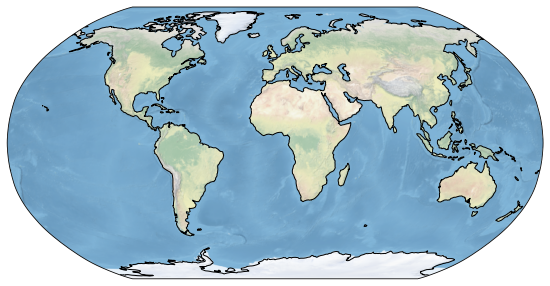

In [92]:
# A simple basemap is easily done

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_global()
ax.stock_img()
ax.coastlines()

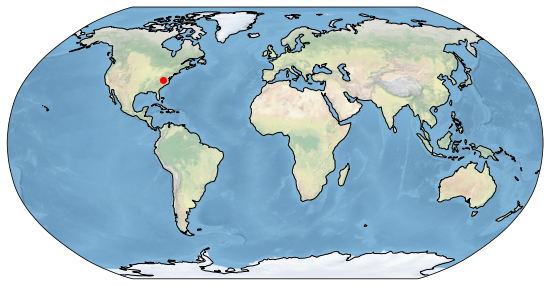

In [95]:
# Adding points manually is also quite simple.  Note the specification of the transform

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_global()
ax.stock_img()
ax.coastlines()

ax.plot(-80.4139, 37.2296, 'ro', transform=ccrs.PlateCarree())

In [ ]:
ccrs.Orthographic

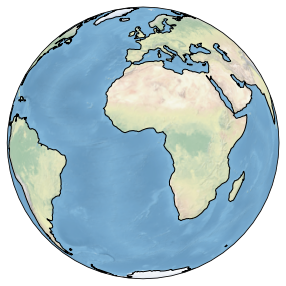

In [99]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0,0))

ax.set_global()
ax.stock_img()
ax.coastlines()

## Animations

In [97]:
# Let's create an animation of the glove spinning!  Install with pip install moviepy if necessary.

from moviepy import editor as mpy

In [100]:
outdir = 'out/animation/'
if not os.path.exists(outdir):
   os.makedirs(outdir)

interval = 5 # degrees
for i,lon in enumerate(range(0,-360,-interval)):
    # Draw the basemap
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(lon,0))    
    ax.set_global()
    ax.stock_img()
    ax.coastlines()

    fig.savefig(outdir + str(i).zfill(2) + '.png',dpi=72)
    plt.close('all')

In [102]:
infiles = glob.glob(outdir + '*.png')

# Write out movie as an mp4 and as a gif
clip = mpy.ImageSequenceClip(infiles, fps=10)
clip.write_videofile('out/spinning_globe.mp4',bitrate='200000k')
clip.write_gif("out/spinning_globe.gif",fps=10)

Moviepy - Building video out/spinning_globe.mp4.
Moviepy - Writing video out/spinning_globe.mp4



Moviepy - Done !
Moviepy - video ready out/spinning_globe.mp4
MoviePy - Building file out/spinning_globe.gif with imageio.


# Basemap

Basemap is one of the oldest Python mapping libraries, so its interaction functionality is a bit limited.  However, it meshes perfectly well with standard geospatial packages like Geopandas, Shapely, and PyProj.  We use it to create static maps we might use in figures.  Much of this section can be found in an earlier form at the [previous version of the course](https://github.com/thomaspingel/intro_to_geospatial_python/blob/master/10.%20Open%20Source%20Geospatial%20Tools%20for%20Python.ipynb).

In [ ]:
# Installs, if necessary
# !pip install moviepy
# !pip install Basemap

from mpl_toolkits.basemap import Basemap

In [ ]:
# Look how easy it is to begin!
map = Basemap()
_ = map.fillcontinents()

In [ ]:
# Use resolution to draw finer or coarser maps
# Options are 'c' (crude), 'l' (low), 'i' (intermediate), 'h' (high)
# 'f' (full) or None
# 'i' and above require the installation of an additional support package

map = Basemap(resolution='l')
_ = map.fillcontinents()

In [ ]:
# A somewhat annoying format can be used to select a particular bounding box
# This is a nice way to get bounding boxes of popular geographic objects:
# http://isithackday.com/geoplanet-explorer/index.php?woeid=24865673

map = Basemap(llcrnrlat=-58, llcrnrlon=-90, urcrnrlat=15, urcrnrlon=-30)
_ = map.fillcontinents(color='black')

In [ ]:
# The Blue Marble is a nice backdrop, and easy to make

map = Basemap()
map.bluemarble()

# Projections

In [ ]:
# It's often a good idea to define limits; the defaults for Mercator, for example
# Will extend to 90/-90, which will cause big problems for an image-based backdrop
# Like blue marble

map = Basemap(projection='merc',urcrnrlat=84,llcrnrlat=-80,llcrnrlon=-180,urcrnrlon=180)
_ = map.fillcontinents(color='black')

In [ ]:
# The defaults:

map = Basemap(projection='merc')
_ = map.fillcontinents(color='black')

## Built-in Layers

In [ ]:
# Many of the layers you're likely interested in are in Basemap already. 

map = Basemap(resolution='c')
map.drawcoastlines(color='black')
map.drawcountries(color='black')
map.drawstates(color='red')

## Two extended examples

In [ ]:
# Adapted from 
# https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/

water = 'lightskyblue'
earth = 'cornsilk'
juneau_lon, juneau_lat = -134.4167, 58.3
 
fig, ax1 = plt.subplots(figsize=(12, 10))

# We create an object that we'll use to draw more than one thing: mm
mm = Basemap(resolution='l',projection='ortho',lon_0=juneau_lon, lat_0=juneau_lat)
coast = mm.drawcoastlines()
continents = mm.fillcontinents(color=earth,lake_color=water,zorder=5)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries(zorder=6)
merid = mm.drawmeridians(np.arange(-180, 180, 15),zorder=2)
parall = mm.drawparallels(np.arange(-90,90,15),zorder=2)

# Convert lon,lat to map coordinates using the map object
x, y = mm(juneau_lon, juneau_lat)
juneau = mm.scatter(x, y, color='red', zorder=10)

plt.savefig('out/basemap_example.png',dpi=300)

In [ ]:
# Load a shapefile, and randomly select 100 populated places
# https://www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places.zip

df = geopandas.read_file('data/ne_10m_populated_places.zip')
idx = np.random.choice(len(df),100)
df = df.iloc[idx,:]

# Draw the basemap
fig, ax1 = plt.subplots(figsize=(6,6))
mm = Basemap(resolution='i',projection='ortho',lon_0=0, lat_0=0)
mm.drawcoastlines()

# Extract and convert the coordinates
lon = [p.x for p in df.geometry]
lat = [p.y for p in df.geometry]
x,y = mm(lon,lat)

# Add them to the map
mm.scatter(x,y,color='red')

# Save to disk
fig.savefig('out/selected_populated_places.png')